In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, \
                                    Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers, initializers, \
                            regularizers, metrics

In [2]:
# 사용할 batch_size 미리 잡아놓기 
b_size = 5

train_datagen = ImageDataGenerator(rescale=1./255,
                                  horizontal_flip=True, # 수평 대칭 이미지를 50% 확률로 만들어줌
                                  width_shift_range=0.1, # 전체 크기의 10% 범위에서 좌우로 이동
                                  height_shift_range=0.1, # 전체 크기의 10% 범위에서 상하로 이동
                                   fill_mode='nearest'
                                  )
train_generator = train_datagen.flow_from_directory(
       './train',                 # 학습셋이 있는 폴더 위치
       target_size=(150, 150),
       batch_size=5,
       class_mode='binary')


Found 160 images belonging to 2 classes.


In [3]:
# 테스트셋은 이미지 부풀리기 과정을 진행하지 않음
test_datagen = ImageDataGenerator(rescale=1./255)
 
test_generator = test_datagen.flow_from_directory(
       './test',                   # 테스트셋이 있는 폴더 위치
       target_size=(150, 150),
       batch_size=5,
       class_mode='binary')

Found 120 images belonging to 2 classes.


In [4]:
print(len(train_generator))

32


In [5]:
print(len(test_generator))

24


In [6]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(150, 150, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        1

In [7]:
model.compile(loss='sparse_categorical_crossentropy',\
             optimizer=optimizers.Adam(learning_rate=0.0002),\
             metrics=['accuracy'])

In [8]:
steps_train = len(train_generator)
steps_test = len(test_generator)

In [9]:
history = model.fit(
       train_generator,
       steps_per_epoch=steps_train, # step_train과 batch_size곱해서 이미지 사이즈 나와야함 
       epochs=20,
       validation_data=test_generator,
       validation_steps=steps_test )

Epoch 1/20
32/32 [==============================] - 12s 363ms/step - loss: 0.7289 - accuracy: 0.4500 - val_loss: 0.6937 - val_accuracy: 0.5000
Epoch 2/20
32/32 [==============================] - 10s 299ms/step - loss: 0.6953 - accuracy: 0.4938 - val_loss: 0.6903 - val_accuracy: 0.5000
Epoch 3/20
32/32 [==============================] - 9s 291ms/step - loss: 0.6908 - accuracy: 0.4938 - val_loss: 0.6881 - val_accuracy: 0.5000
Epoch 4/20
32/32 [==============================] - 9s 287ms/step - loss: 0.6865 - accuracy: 0.5688 - val_loss: 0.6778 - val_accuracy: 0.7417
Epoch 5/20
32/32 [==============================] - 9s 287ms/step - loss: 0.6663 - accuracy: 0.6500 - val_loss: 0.6808 - val_accuracy: 0.5000
Epoch 6/20
32/32 [==============================] - 11s 329ms/step - loss: 0.6788 - accuracy: 0.6313 - val_loss: 0.6577 - val_accuracy: 0.5250
Epoch 7/20
32/32 [==============================] - 10s 308ms/step - loss: 0.6414 - accuracy: 0.6438 - val_loss: 0.6010 - val_accuracy: 0.7583
Ep

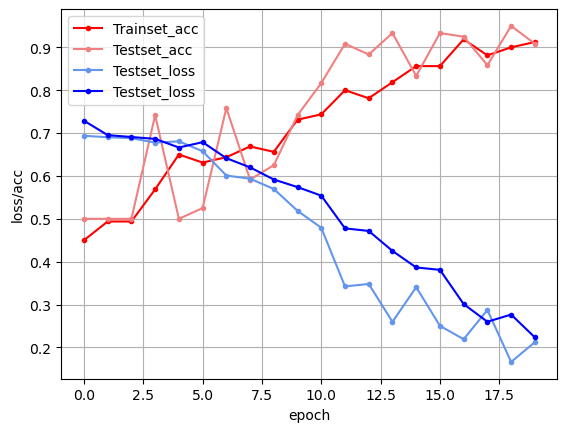

In [10]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, acc, marker='.', c='red', label='Trainset_acc')
plt.plot(x_len, val_acc, marker='.', c='lightcoral', \
         label='Testset_acc')
plt.plot(x_len, y_vloss, marker='.', c='cornflowerblue', \
         label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', \
         label='Trainset_loss')
plt.legend(loc='upper left')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss/acc')
plt.show()

